<a href="https://colab.research.google.com/github/DavoodSZ1993/RL/blob/main/06_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

env.action_space, env.observation_space, env.reset(), env.step(0)

(Discrete(4), Discrete(16), 0, (0, 0.0, False, {'prob': 0.3333333333333333}))

# SARSA - On Policy TD Control
SARSA (State-Action Reward State-Action) is an on-policy learning method, as it uses an $\epsilon$-greedy strategy for all the steps. 

It updates the Q-value for a certain action based on the obtained reward from taking that action and the reward from the state after that assuming it keeps following the policy.

$$
Q(s_t,a_t) = Q(s_t, a_t) + \alpha (R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t))
$$

In [23]:
def action_epsilon_greedy(q, s, epsilon=0.5):
  if np.random.rand() > epsilon:
    return np.argmax(q[s])
  return np.random.randint(4)

In [24]:
def get_action_epsilon_greedy(epsilon):
  return lambda q,s: action_epsilon_greedy(q, s, epsilon=epsilon)

In [25]:
def average_performance(policy_fct, q):
  acc_returns = 0.
  n = 500
  
  for i in range(n):
    done = False
    s = env.reset()

    while not done:
      a = policy_fct(q, s)
      s, reward, done, _ = env.step(a)
      acc_returns += reward

  return acc_returns/n

In [26]:
nb_episodes = 200000
STEPS = 2000

In [27]:
# SARSA - On-policy TD control algorithm
def sarsa(alpha=0.02, gamma = 1., epsilon = 0.05,  q = None, progress=None, env=env):
  if q is None:
    q = np.ones((16, 4))

  for i in range(nb_episodes):
    done = False
    s = env.reset()
    a = action_epsilon_greedy(q, s, epsilon = epsilon)

    while not done:
      new_s, reward, done, _ = env.step(a)
      new_a = action_epsilon_greedy(q, new_s, epsilon)
      q[s, a] = q[s, a] + alpha * (reward + gamma * q[new_s, new_a] - q[s, a])
      s = new_s
      a = new_a

    # Only for plotting the performance, not part of the algorithm
    if progress is not None and i%STEPS==0:
      progress[i//STEPS] = average_performance(get_action_epsilon_greedy(epsilon), q=q)

  return q, progress

In [28]:
param_performance = dict()

for param in np.arange(0.01, 0.11, 0.02):
  progress = np.zeros((nb_episodes//STEPS))
  _, param_performance[str(param)] = sarsa(epsilon=param, progress=progress)
  print("done:", param)

done: 0.01
done: 0.03
done: 0.049999999999999996
done: 0.06999999999999999
done: 0.08999999999999998


In [29]:
def plot_performance(performance):
  
  nb_plots = len(performance)
  plt.figure(figsize=(10, 20))
  plt.suptitle("Learning progress depending on epsilon")

  for i, perf in enumerate(sorted(performance)):
    plt.subplot(nb_plots, 1, i+1)
    plt.plot(STEPS * np.arange(nb_episodes//STEPS), performance[perf], label=perf)
    plt.xlabel("epochs")
    plt.ylim(-0.01,0.7)
    plt.ylabel("average reward of an epoch")
    plt.legend()

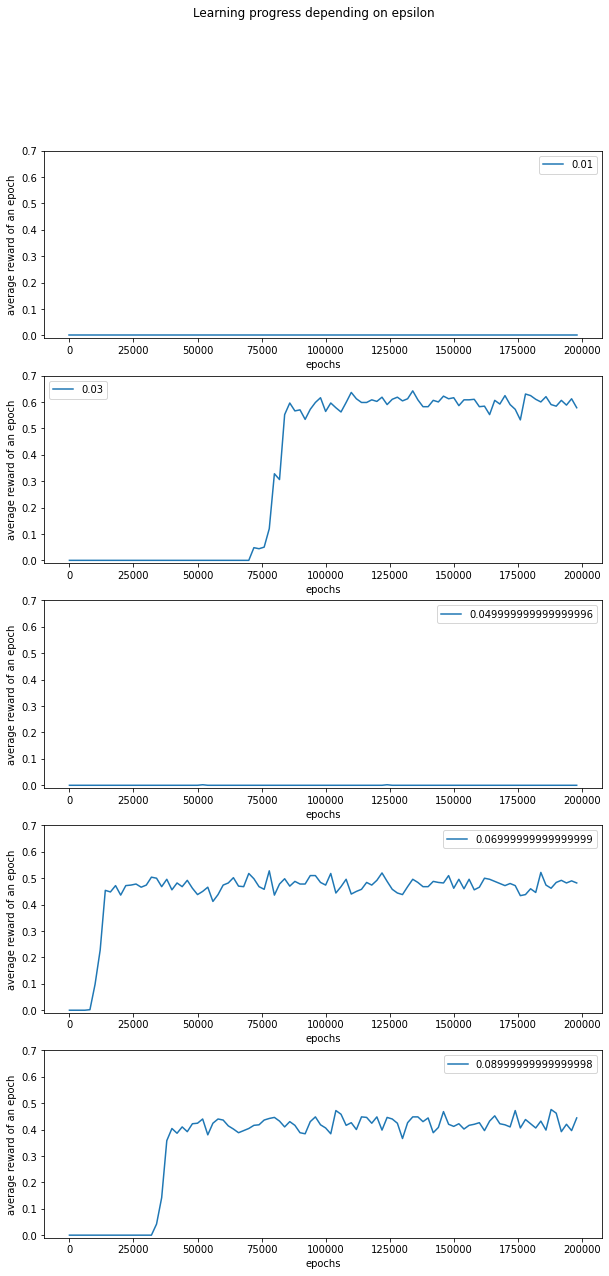

In [30]:
plot_performance(param_performance)

In [31]:
sarsa_performance = np.ndarray(nb_episodes//STEPS)
q, sarsa_performance = sarsa(progress=sarsa_performance)

Text(0, 0.5, 'average reward for an epoch')

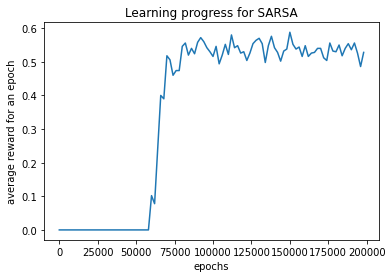

In [32]:
plt.plot(STEPS*np.arange(nb_episodes//STEPS), sarsa_performance)
plt.xlabel("epochs")
plt.title("Learning progress for SARSA")
plt.ylabel("average reward for an epoch")

In [33]:
def greedy_policy(q, s):
  return np.argmax(q[s])

print(average_performance(greedy_policy, q=q))

0.698
